In [1]:
import sys
sys.path.append('../core/')
sys.path.append('../networks/')
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

from gumbel_fc import *
from vae_cat import *

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
slim=tf.contrib.slim
Bernoulli = tf.contrib.distributions.Bernoulli

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
#from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.python.framework import dtypes
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
from dataset import DataSet
mnist = read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [74]:
tf.reset_default_graph()

In [75]:
sess = tf.InteractiveSession()
enc = Encoder()
dec = Decoder()
model = Variational_Autoencoder(sess, enc, dec, checkpoint_name = 'vae_cat_checkpoint',
                               dataset=mnist.train, num_epochs=20)

In [79]:
model.train()

Epoch 1 loss: 103.431911607
Epoch 2 loss: 103.0866209
Epoch 3 loss: 103.059688637
Epoch 4 loss: 102.763941581
Epoch 5 loss: 102.651722551
Epoch 6 loss: 102.524425229
Epoch 7 loss: 102.523473053
Epoch 8 loss: 102.276940585
Epoch 9 loss: 102.381010576
Epoch 10 loss: 102.113454326
Epoch 11 loss: 102.24841955
Epoch 12 loss: 101.968013722
Epoch 13 loss: 102.083030978
Epoch 14 loss: 102.072308474
Epoch 15 loss: 101.987118946
Epoch 16 loss: 102.022634846
Epoch 17 loss: 101.808215443
Epoch 18 loss: 101.935336262
Epoch 19 loss: 102.044112563
Epoch 20 loss: 101.896797971


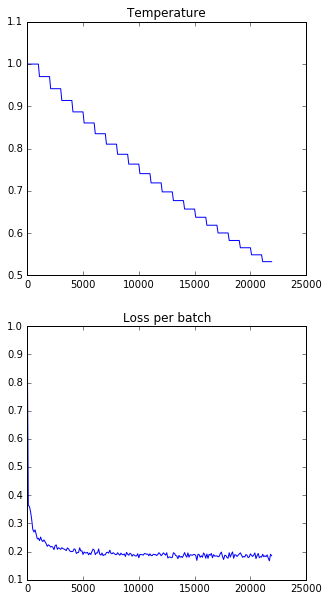

In [80]:
log = model.log
log = np.array(log).T
plt.figure(figsize=(5,10))
plt.subplot(2,1,1)
plt.plot(log[0,], log[1,])
plt.title('Temperature')
plt.subplot(2,1,2)
plt.plot(log[0,], log[2,])
plt.title('Loss per batch')
plt.show()

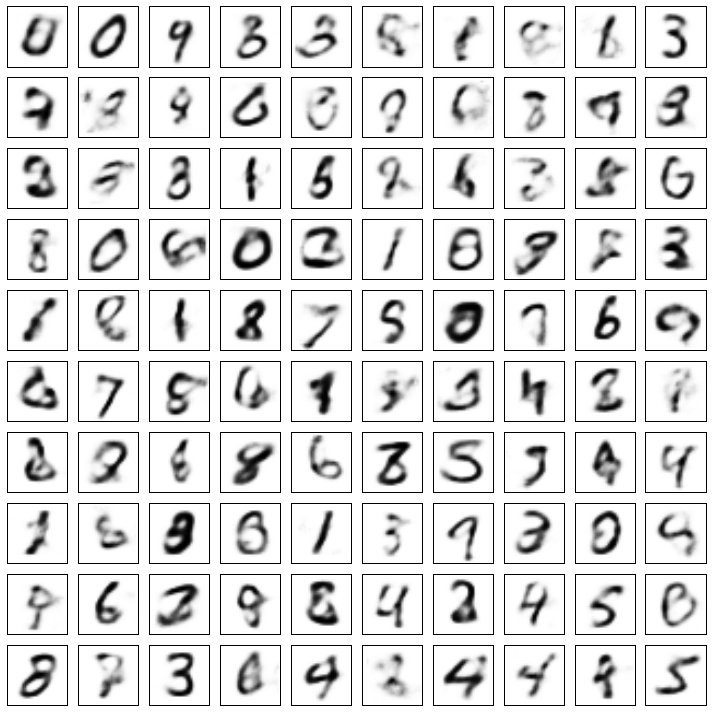

In [81]:
gen = model.generate()

plt.figure(figsize=(10,10))
for i in xrange(10):
    for j in xrange(10):
        plt.subplot(10, 10, 10*i+j+1)
        plt.imshow(gen[10*i+j].reshape(28,28), cmap='gray_r')
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()
plt.savefig('images/vae_cat')
plt.show()
